# Descriptive Visualizations

The purpose of this notebook is to visually examine the nominal features, discard the useless ones among them, and create new factor variables.

The "main" plot used in this notebook is *OverQual* vs. *SalePrice* as the overall living area is the most correlated predictor (which is also very intuitive). Many of the nominal variables change the slopes of the regression lines for sub-groups of data points significantly.

## The Data

In [64]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import IsolationForest

#housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing = pd.read_csv('clean_housing.csv', index_col=0)
housing_new = pd.read_csv('housing_new.csv', index_col=0)
housing = housing[housing.GrLivArea<3700]
housing[housing.LotArea<70000]

,repeat1,repeat,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lat,long,dist,income,GrLivArea_year,GrLivArea_by_hood,Price_by_hood,Price_by_yr,Price_by_month,TotalSF,bathrm_cnt,patioSF
0,0,0,126000,909176150,856,30,0,60.0,7890,1,-0.1,0,0,Corner,Gtl,SWISU,0,0,0,1.0,6,6,8.426150,7.745967,0,CompShg,0,0,0,0.0,4,4,0.0,4,4,0,0,238.0,0,0.0,618.0,856.0,0,4,1,SBrkr,856,0,0,1.0,0.0,1,0,2,1,4,4,0,1,6,0,8.426150,Unf,2.0,399.0,4,4,1,0,0,0,0,166,0,0,No Fence,0,3,0.000000,0,0,42.018564,-93.651619,0.998896,52375.0,1018.640,1590.000000,141548.938053,148515.221643,133047.651475,1712.0,2.0,166
1,1,1,139500,905476230,1049,120,0,42.0,4235,1,-0.1,0,0,Inside,Gtl,Edwards,0,0,0,1.0,5,5,5.099020,5.099020,0,CompShg,0,0,0,149.0,6,4,0.0,6,4,1,1,552.0,0,393.0,104.0,1049.0,0,4,1,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,6,5,0,0,4,1,5.099020,Fin,1.0,266.0,4,4,1,0,105,0,0,0,0,0,No Fence,0,2,1.000000,0,0,42.024855,-93.663671,1.433537,21333.0,1267.192,1279.558282,117037.821586,150699.883234,163437.446746,2098.0,3.0,105
2,2,2,124900,911128020,1001,30,0,60.0,6060,1,-0.1,0,0,Inside,Gtl,IDOTRR,0,0,0,1.0,5,9,8.944272,1.732051,1,CompShg,0,0,0,0.0,6,4,-0.5,4,4,0,0,737.0,0,0.0,100.0,837.0,0,8,1,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,6,5,0,0,4,0,8.944272,Unf,1.0,216.0,4,1,0,154,0,42,86,0,0,0,No Fence,0,11,1.732051,0,0,42.032210,-93.632788,2.462372,52375.0,1209.208,1239.671053,86192.145849,164411.563473,170739.569565,1838.0,1.0,282
3,3,3,114000,535377150,1039,70,0,80.0,8146,1,-0.1,0,0,Corner,Gtl,OldTown,0,0,0,2.0,4,8,10.488088,2.645751,0,CompShg,0,0,0,0.0,6,6,-0.5,3,4,0,-1,800.0,0,0.0,405.0,405.0,0,6,1,SBrkr,717,322,0,0.0,0.0,1,0,2,1,4,6,0,0,4,0,8.366600,Unf,1.0,281.0,4,4,0,0,0,168,0,111,0,0,No Fence,0,5,1.000000,0,0,42.037391,-93.612207,3.072689,52375.0,1255.112,1427.962441,132799.233062,150699.883234,150102.980769,1444.0,1.0,279
4,4,4,227000,534177230,1665,60,0,70.0,8400,1,-0.1,0,0,Inside,Gtl,NWAmes,0,0,0,2.0,8,6,3.000000,3.000000,0,CompShg,0,0,0,0.0,6,4,1.0,6,4,0,1,643.0,0,0.0,167.0,810.0,0,8,1,SBrkr,810,855,0,1.0,0.0,2,1,3,1,6,6,0,0,4,1,3.000000,Fin,2.0,528.0,4,4,1,0,45,0,0,0,0,0,No Fence,0,11,1.000000,0,0,42.044554,-93.631818,2.326978,61991.0,2011.320,1699.138211,190372.398374,150699.883234,170739.569565,2475.0,3.5,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845,4178,2567,196500,908128100,1724,60,0,62.0,7162,1,-0.1,0,0,Inside,Gtl,Edwards,0,0,0,2.0,7,5,2.645751,2.449490,1,CompShg,0,0,0,190.0,6,4,1.0,6,4,0,-1,800.0,0,0.0,796.0,796.0,0,8,1,SBrkr,806,918,0,0.0,0.0,2,1,3,1,6,8,0,1,6,0,2.645751,Fin,2.0,616.0,4,4,1,168,57,0,0,0,0,0,No Fence,0,5,2.000000,0,0,42.019007,-93.672746,2.331425,33311.0,2044.664,1279.558282,117037.821586,145412.995050,150102.980769,2520.0,2.5,225
6847,4180,2569,139600,905402060,1733,20,0,60.0,13680,1,-0.1,1,0,CulDSac,Gtl,Edwards,0,0,0,1.0,3,5,7.416198,7.416198,1,CompShg,0,0,0,0.0,4,4,-0.5,4,4,0,0,800.0,0,0.0,0.0,800.0,0,8,1,FuseA,1733,0,0,0.0,0.0,2,0,4,1,4,8,0,1,6,1

In [2]:
housing

,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,126000,909176150,856,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,139500,905476230,1049,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,124900,911128020,1001,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,114000,535377150,1039,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,227000,534177230,1665,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,121000,903205040,952,30,RL,NaN,8854,Pave,NaN,Reg,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
760,139600,905402060,1733,20,RL,NaN,13680,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
761,145000,909275030,2002,90,RH,82.0,6270,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
762,217500,907192040,1842,60,RL,NaN,8826,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


In [3]:
pd.set_option("display.max_columns", 120)

In [4]:
sns.set_style("white")

In [5]:
housing.SalePrice.describe() #Getting more inf on SalePrice

count      2577.000000
mean     177791.764843
std       74178.844213
min       12789.000000
25%      129900.000000
50%      159900.000000
75%      209500.000000
max      625000.000000
Name: SalePrice, dtype: float64

Mean is 151939 and 75% value is 175000. Max is 625000. It looks like the SalesPrice is skewed. Let's check the skewness

Skew is: 1.6512157649915495


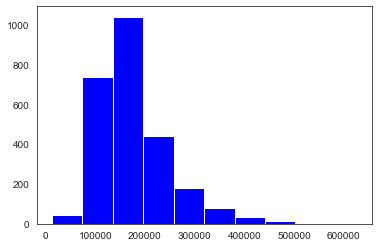

In [6]:
print ("Skew is:", housing.SalePrice.skew()) #Printing the skewness
plt.hist(housing.SalePrice, color='blue')
plt.show()

Skewness is positive so it is Right Skewed. Will take a log for target of SalesPrice. Skewness should be closer to zero.



Skew is: 0.023413358670366133


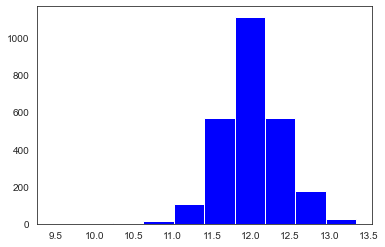

In [7]:
target = np.log(housing.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

## Load the Data


In [8]:
housing.shape

(2577, 81)

(array([  1.,   3.,   4.,  15.,  21.,  63.,  74., 124., 173., 304., 277.,
        228., 178., 193., 164., 105., 110.,  84.,  76.,  66.,  43.,  52.,
         32.,  25.,  28.,  22.,  19.,  13.,   5.,  18.,   9.,   8.,   7.,
          6.,   3.,   4.,   3.,   5.,   1.,   2.,   0.,   0.,   2.,   0.,
          1.,   0.,   1.,   1.,   2.,   2.]),
 array([ 12789.  ,  25033.22,  37277.44,  49521.66,  61765.88,  74010.1 ,
         86254.32,  98498.54, 110742.76, 122986.98, 135231.2 , 147475.42,
        159719.64, 171963.86, 184208.08, 196452.3 , 208696.52, 220940.74,
        233184.96, 245429.18, 257673.4 , 269917.62, 282161.84, 294406.06,
        306650.28, 318894.5 , 331138.72, 343382.94, 355627.16, 367871.38,
        380115.6 , 392359.82, 404604.04, 416848.26, 429092.48, 441336.7 ,
        453580.92, 465825.14, 478069.36, 490313.58, 502557.8 , 514802.02,
        527046.24, 539290.46, 551534.68, 563778.9 , 576023.12, 588267.34,
        600511.56, 612755.78, 625000.  ]),
 <BarContainer object o

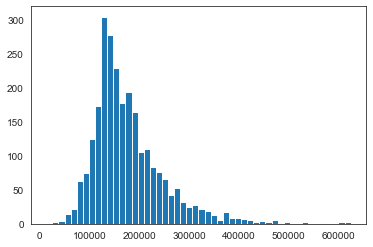

In [9]:
# Check the distribution of the sale price
plt.hist(housing.SalePrice, bins = 50)


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


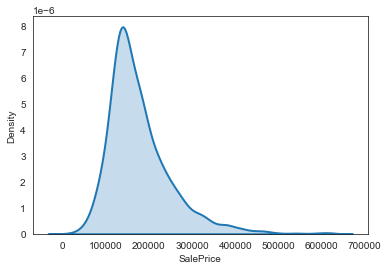

In [10]:
sns.distplot(housing.SalePrice, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2})
plt.show()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   1.,   2.,   0.,   2.,   1.,   5.,   6.,  13.,   6.,
         14.,  34.,  38.,  41.,  58., 103., 145., 221., 255., 239., 210.,
        216., 191., 138., 142., 115.,  93.,  82.,  47.,  52.,  29.,  26.,
         21.,   9.,   8.,   2.,   3.,   6.]),
 array([ 9.45641889,  9.53420069,  9.61198248,  9.68976427,  9.76754607,
         9.84532786,  9.92310965, 10.00089144, 10.07867324, 10.15645503,
        10.23423682, 10.31201861, 10.38980041, 10.4675822 , 10.54536399,
        10.62314578, 10.70092758, 10.77870937, 10.85649116, 10.93427296,
        11.01205475, 11.08983654, 11.16761833, 11.24540013, 11.32318192,
        11.40096371, 11.4787455 , 11.5565273 , 11.63430909, 11.71209088,
        11.78987268, 11.86765447, 11.94543626, 12.02321805, 12.10099985,
        12.17878164, 12.25656343, 12.33434522, 12.41212702, 12.48990881,
        12.5676906 , 12.64547239, 12.72325419, 12.80103598, 12.87881777,
 

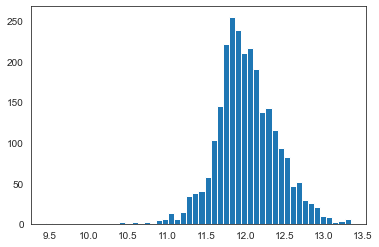

In [11]:
#use the log function to make the data normal
plt.hist(np.log(housing.SalePrice+1), bins = 50)

In [12]:
housing.head()

,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,126000,909176150,856,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,139500,905476230,1049,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,124900,911128020,1001,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,114000,535377150,1039,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,227000,534177230,1665,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


Collect the newly created variables in the *new_variables* list.

In [13]:
new_variables = []

### Categorical Data

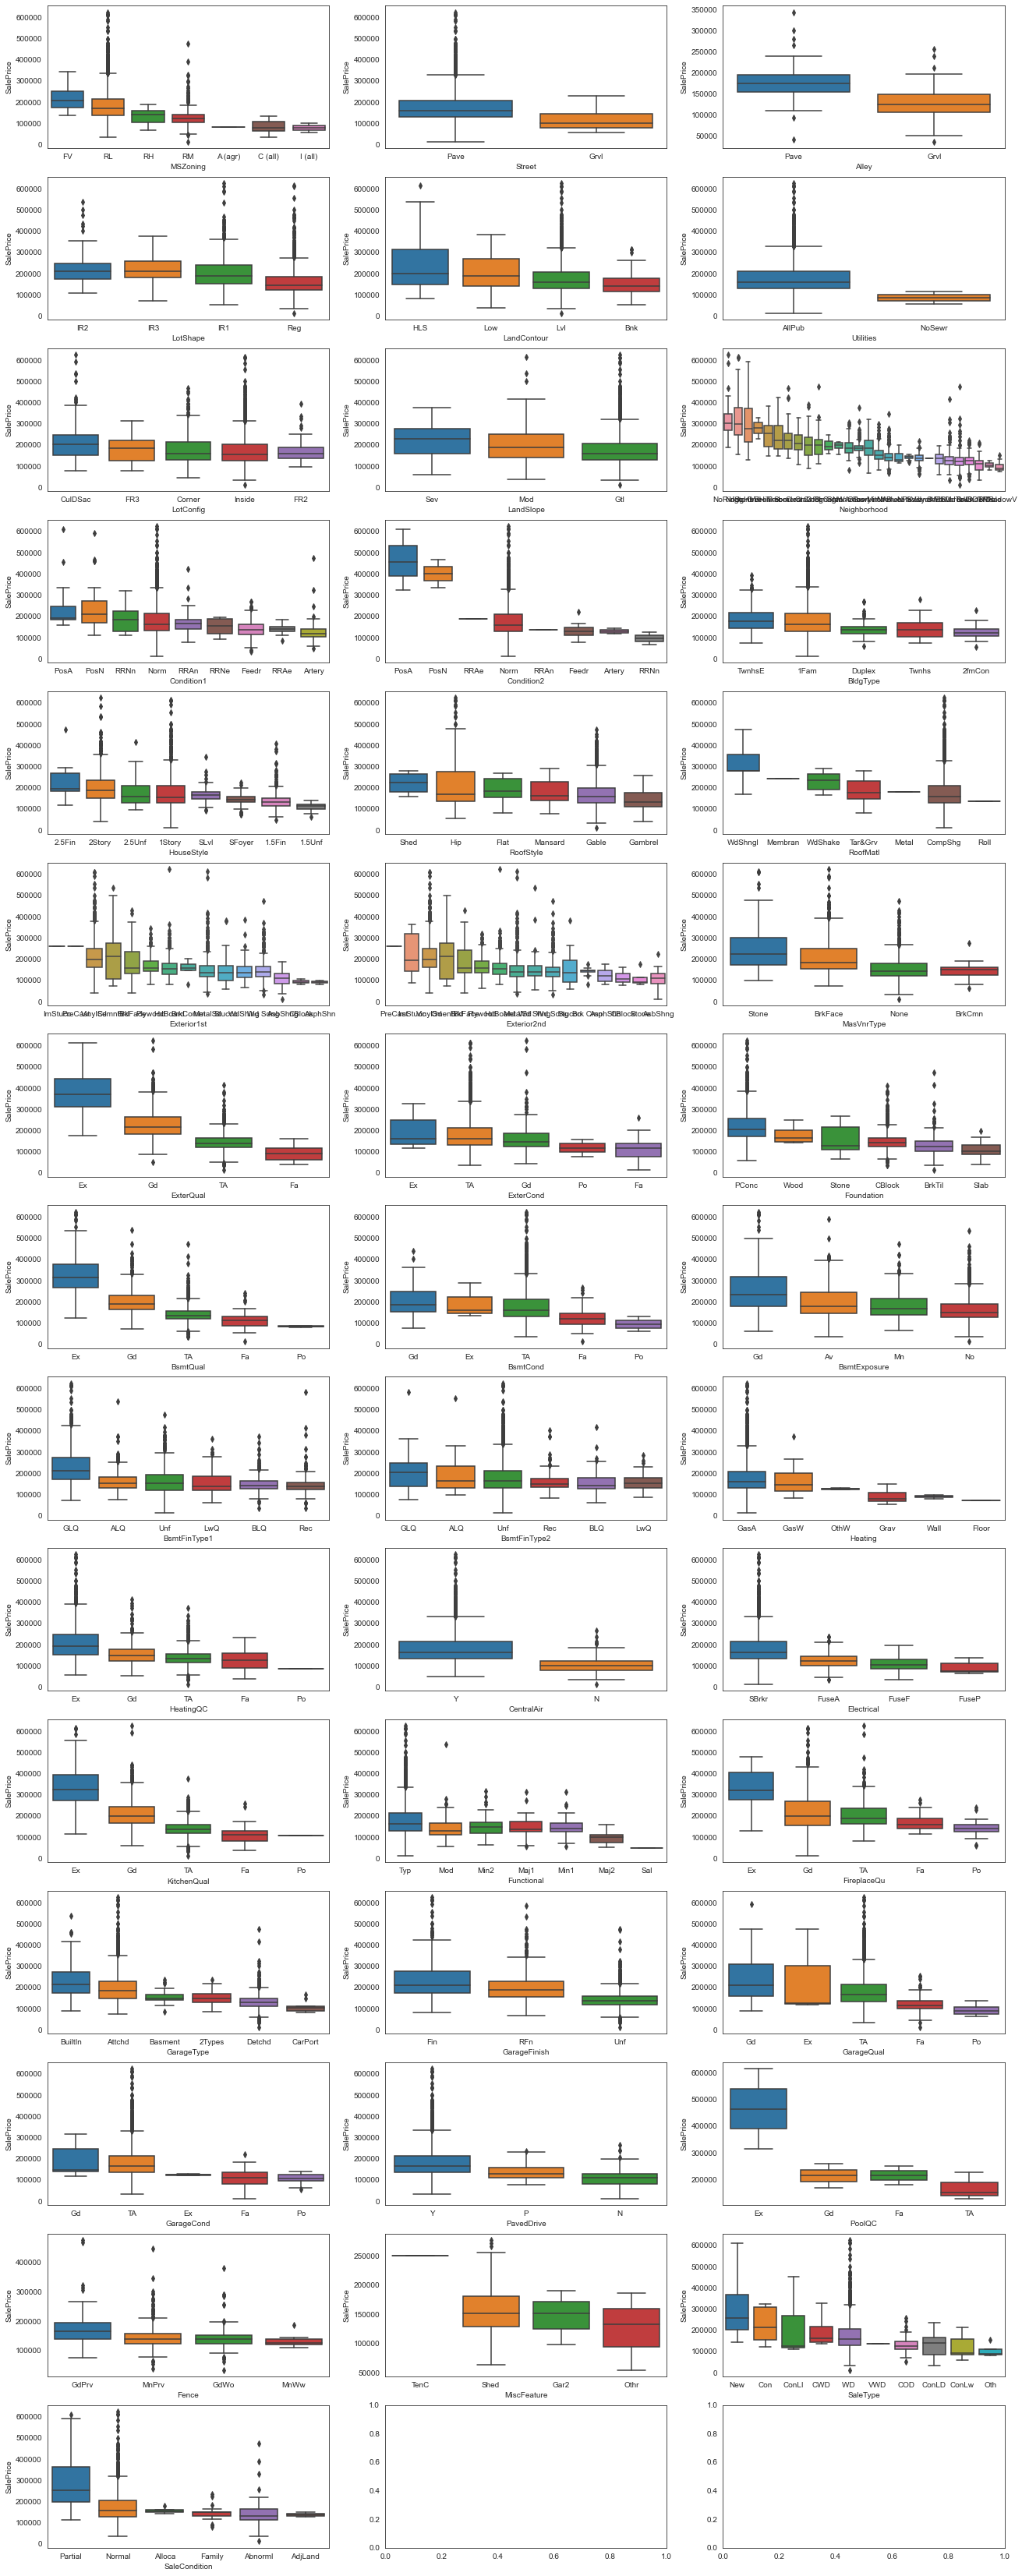

In [14]:
obj_cols = housing.select_dtypes(include = ['object'])
fig, axes = plt.subplots(ncols=3, nrows= 15,figsize=(22,60))

for i, c in enumerate(obj_cols):
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    order = housing.groupby(c)['SalePrice'].mean().fillna(0).sort_values()[::-1].index
    sns.boxplot(x=housing[c], y=housing['SalePrice'], ax = ax_curr, order=order)
plt.show()

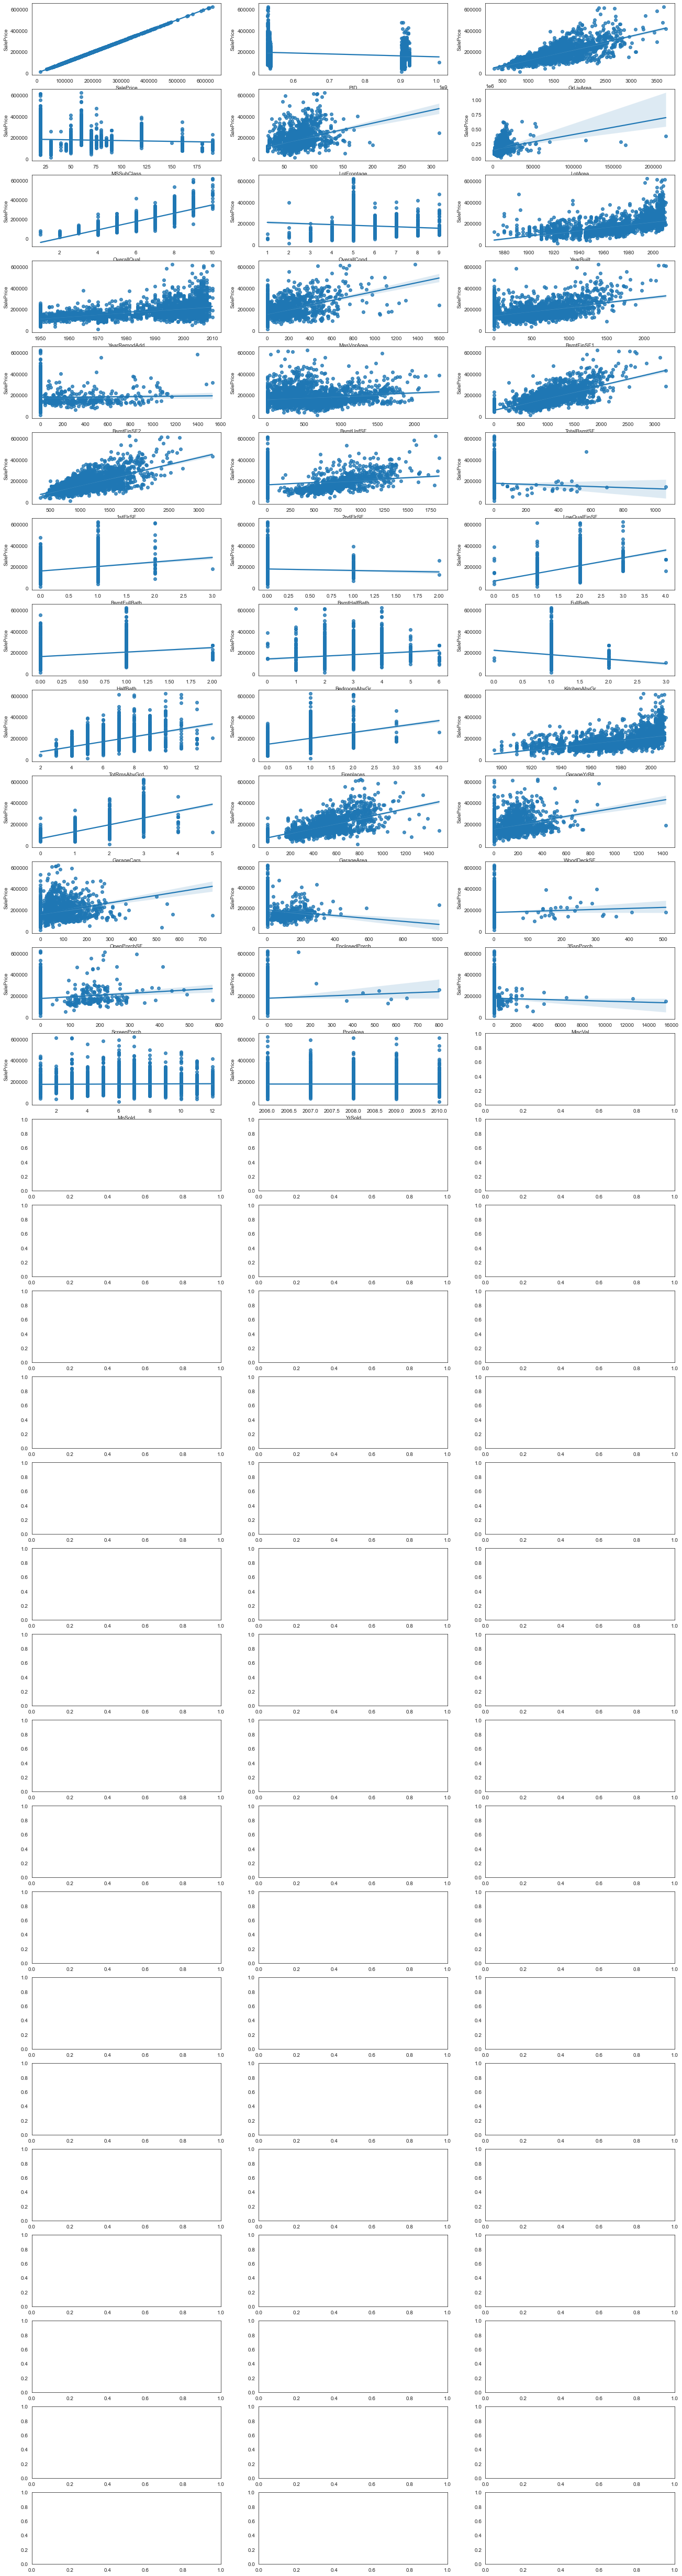

In [15]:
#taking a look at numeric features by using a scatterplot against the SalePrice
num_cols = housing._get_numeric_data()

fig, axes = plt.subplots(ncols=3, nrows= 30,figsize=(22,90))

for i, c in enumerate(num_cols):
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    sns.regplot(x=housing[c], y=housing['SalePrice'], ax = ax_curr)
plt.show()

## Derived Characteristics

Certain characteristics of a house are assumed to have a "binary" influence on the sales price. For example, the existence of a pool could be an important predictor while the exact size of the pool can be deemed not so important.

The below cell creates boolean factor variables out of a set of numeric variables.

In [16]:
derived_variables = {
    "has 2nd Flr": "2ndFlrSF",
    "has Bsmt": "TotalBsmtSF",
    "has Fireplace": "Fireplaces",
    "has Garage": "GarageArea",
    "has Pool": "PoolArea",
    
}
# Factorize numeric columns.
for factor_column, column in derived_variables.items():
    housing[factor_column] = housing[column].apply(lambda x: 1 if x > 0 else 0)
derived_variables = list(derived_variables.keys())

In [17]:
housing[derived_variables].head()

,has 2nd Flr,has Bsmt,has Fireplace,has Garage,has Pool
1,0,1,1,1,0
2,0,1,0,1,0
3,0,1,0,1,0
4,1,1,0,1,0
5,1,1,0,1,0


### 2nd Floors

A second floor may have a positive effect on the sales price. However, having a second floor correlates with overall living space. The individual effect is therefore not as clear as it seems in the plot below. The properties that have the same GrLivArea on two floors seems to cost less than those that have only a single floor. This is because the first floor is actually half the size and the compound is likely to be smaller.

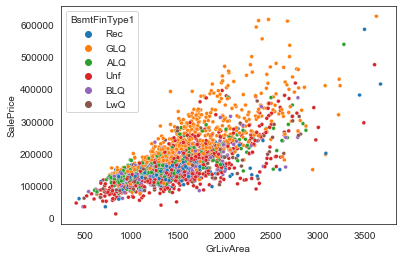

In [18]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="BsmtFinType1", s=15, data=housing);

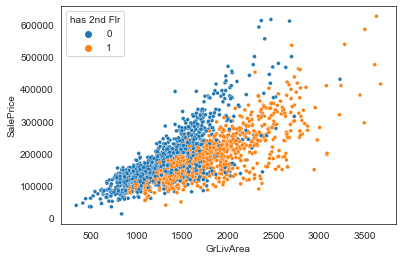

In [19]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has 2nd Flr", s=15, data=housing);

### Basements

Nearly all houses in Ames, IA, have a basement. Therefore, *has Bsmt* is most likely not an important predictor.

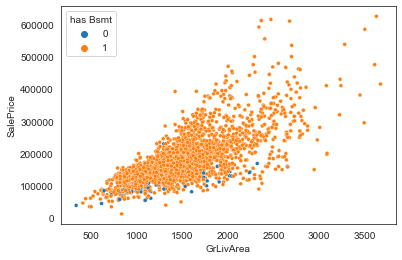

In [20]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has Bsmt", s=15, data=housing);

### Fireplaces

Bigger houses are more likely to have a fireplace. Thus, the variable *has Fireplace* might be an interesting predictor for bigger houses

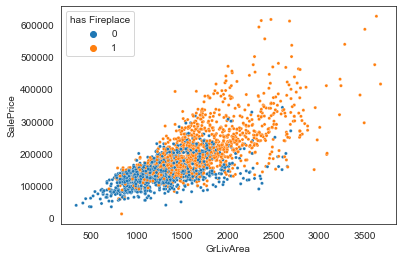

In [21]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has Fireplace", s=10, data=housing);

### Garages

Holding the overall living area fixed adding a garage seems to affect the price positively. Thus, *has Garage* seems like an interesting predictor as well.

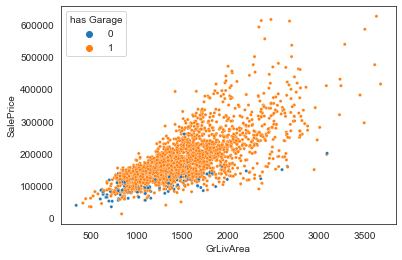

In [22]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has Garage", s=10, data=housing);

### Pools

Unfortunately, almost no one in Ames, IA, has a pool. The predictor *has Pool* seems quite uninteresting.

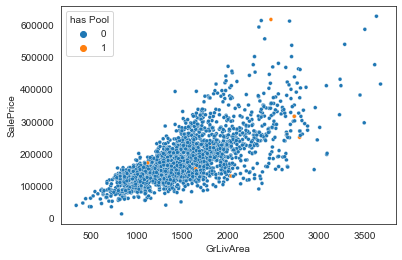

In [23]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has Pool", s=15, data=housing);

### Quality

Bigger houses seems to have better qualities.

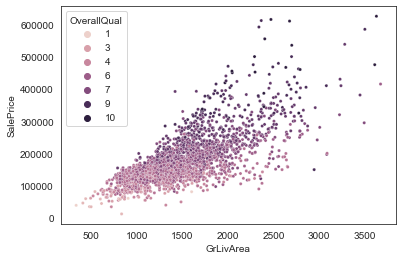

In [24]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue= "OverallQual", s=10, data=housing);

## Neighborhoods


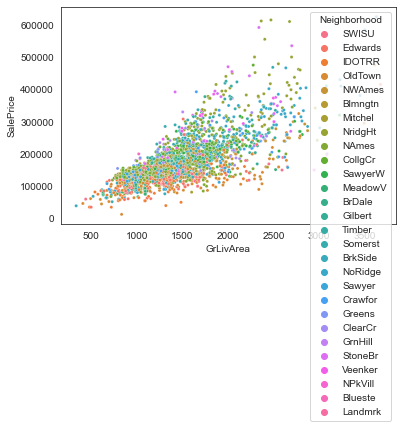

In [25]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue= "Neighborhood", s=10, data=housing); 

In [26]:
housing

,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,has 2nd Flr,has Bsmt,has Fireplace,has Garage,has Pool
1,126000,909176150,856,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,0,1,1,1,0
2,139500,905476230,1049,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,0,1,0,1,0
3,124900,911128020,1001,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,0,1,0,1,0
4,114000,535377150,1039,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,1,1,0,1,0
5,227000,534177230,1665,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,121000,903205040,952,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal,0,1,1,1,0
760,139600,905402060,1733,20,RL,NaN,13680,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,0,0,1,1,0
761,145000,909275030,2002,90,RH,82.0,6270,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,TA,N,FuseA,1001,1001,

### TotalSF

<AxesSubplot:xlabel='TotalSF', ylabel='SalePrice'>

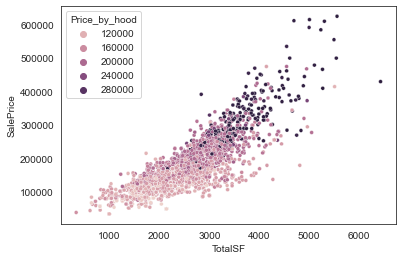

In [75]:
sns.scatterplot(x="TotalSF", y="SalePrice", hue="Price_by_hood", s=15, data=housing)

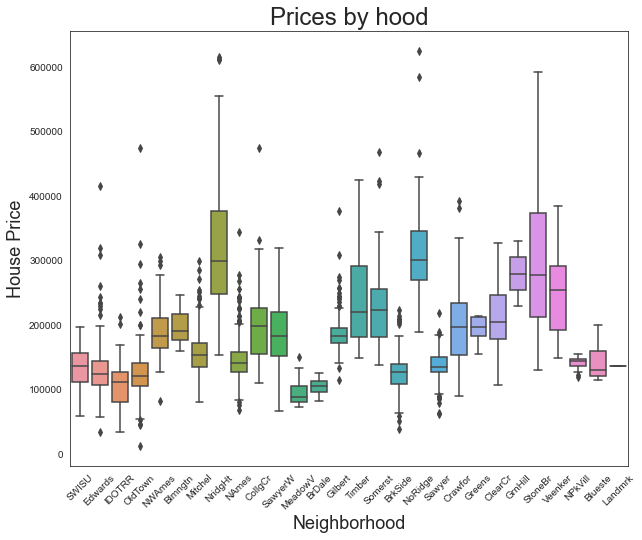

In [28]:
_, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x="Neighborhood", y="SalePrice", data=housing, ax=ax)
ax.set_title("Prices by hood", fontsize=24)
ax.set_xlabel("Neighborhood", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("House Price", fontsize=18);

In [29]:
housing_new

,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,...,dist,income,GrLivArea_year,GrLivArea_by_hood,Price_by_hood,Price_by_yr,Price_by_month,TotalSF,bathrm_cnt,patioSF,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__Greens,Neighborhood__GrnHill,Neighborhood__IDOTRR,Neighborhood__Landmrk,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,Electrical__FuseF,Electrical__FuseP,Electrical__None,Electrical__SBrkr,GarageFinish__No Garage,GarageFinish__RFn,GarageFinish__Unf,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__No Fence
0,126000,909176150,856,30,0,60.0,7890,1,-0.1,0,0,0,0.0,0,1.0,6,6,8.426150,7.745967,0,0,0,0.0,0.000000,4,4,0.0,4,4,0,0,238.0,0,0.0,618.0,856.0,0,4,1,856,0,0.0,1.0,0.0,1,0,2,0.693147,4,4,0.0,1,6,0,8.426150,2.0,399.0,4,4,1,...,0.998896,52375.0,1018.640,1590.000000,141548.938053,148515.221643,133047.651475,1712.0,2.0,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,139500,905476230,1049,120,0,42.0,4235,1,-0.1,0,0,0,0.0,0,1.0,5,5,5.099020,5.099020,0,0,0,0.0,5.010635,6,4,0.0,6,4,1,1,552.0,0,393.0,104.0,1049.0,0,4,1,1049,0,0.0,1.0,0.0,2,0,2,0.693147,6,5,0.0,0,4,1,5.099020,1.0,266.0,4,4,1,...,1.433537,21333.0,1267.192,1279.558282,117037.821586,150699.883234,163437.446746,2098.0,3.0,105,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,124900,911128020,1001,30,0,60.0,6060,1,-0.1,0,0,0,0.0,0,1.0,5,9,8.944272,1.732051,1,0,0,0.0,0.000000,6,4,-0.5,4,4,0,0,737.0,0,0.0,100.0,837.0,0,8,1,1001,0,0.0,0.0,0.0,1,0,2,0.693147,6,5,0.0,0,4,0,8.944272,1.0,216.0,4,1,0,...,2.462372,52375.0,1209.208,1239.671053,86192.145849,164411.563473,170739.569565,1838.0,1.0,282,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
3,114000,535377150,1039,70,0,80.0,8146,1,-0.1,0,0,0,0.0,0,2.0,4,8,10.488088,2.645751,0,0,0,0.0,0.000000,6,6,-0.5,3,4,0,-1,800.0,0,0.0,405.0,405.0,0,6,1,717,322,0.0,0.0,0.0,1,0,2,0.693147,4,6,0.0,0,4,0,8.366600,1.0,281.0,4,4,0,...,3.072689,52375.0,1255.112,1427.962441,132799.233062,150699.883234,150102.980769,1444.0,1.0,279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,227000,534177230,1665,60,0,70.0,8400,1,-0.1,0,0,0,0.0,0,2.0,8,6,3.000000,3.000000,0,0,0,0.0,0.000000,6,4,1.0,6,4,0,1,643.0,0,0.0,167.0,810.0,0,8,1,810,855,0.0,1.0,0.0,2,1,3,0.693147,6,6,0.0,0,4,1,3.000000,2.0,528.0,4,4,1,...,2.326978,61991.0,2011.320,1699.138211,190372.398374,150699.883234,170739.569565,2475.0,3.5,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

The 28 neighborhoods are encoded as factor variables.

In [30]:
neighborhood = pd.get_dummies(housing["Neighborhood"], prefix="nhood_", drop_first=True)
housing = pd.concat([housing, neighborhood], axis=1)


In [31]:
housing

,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,has 2nd Flr,has Bsmt,has Fireplace,has Garage,has Pool,nhood__Blueste,nhood__BrDale,nhood__BrkSide,nhood__ClearCr,nhood__CollgCr,nhood__Crawfor,nhood__Edwards,nhood__Gilbert,nhood__Greens,nhood__GrnHill,nhood__IDOTRR,nhood__Landmrk,nhood__MeadowV,nhood__Mitchel,nhood__NAmes,nhood__NPkVill,nhood__NWAmes,nhood__NoRidge,nhood__NridgHt,nhood__OldTown,nhood__SWISU,nhood__Sawyer,nhood__SawyerW,nhood__Somerst,nhood__StoneBr,nhood__Timber,nhood__Veenker
1,126000,909176150,856,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,139500,905476230,1049,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,124900,911128020,1001,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,114000,535377150,1039,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,227000,534177230,1665,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,121000,903205040,952,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,T

In [32]:
new_variables.extend(neighborhood.columns)

In [33]:
housing[neighborhood.columns].shape

(2577, 27)

In [34]:
housing[neighborhood.columns].head()

,nhood__Blueste,nhood__BrDale,nhood__BrkSide,nhood__ClearCr,nhood__CollgCr,nhood__Crawfor,nhood__Edwards,nhood__Gilbert,nhood__Greens,nhood__GrnHill,nhood__IDOTRR,nhood__Landmrk,nhood__MeadowV,nhood__Mitchel,nhood__NAmes,nhood__NPkVill,nhood__NWAmes,nhood__NoRidge,nhood__NridgHt,nhood__OldTown,nhood__SWISU,nhood__Sawyer,nhood__SawyerW,nhood__Somerst,nhood__StoneBr,nhood__Timber,nhood__Veenker
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Alleys

Almost no house has access to an alley.

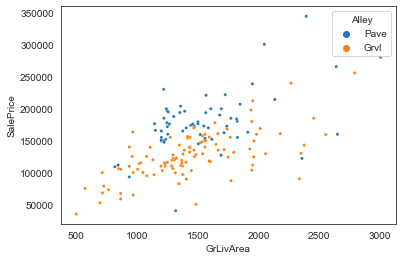

In [35]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Alley", s=10, data=housing);

### Building Type

The type of a building clearly affects the valuation. The two types of townhouses as well as the 2-family condo and duplex type are summarized into a single category. This makes sense a) semantically, and b) by looking at the two sub-clusters in the scatter plot.

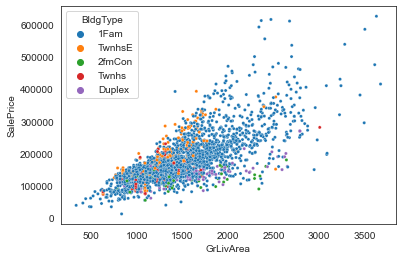

In [36]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="BldgType", s=10, data=housing);

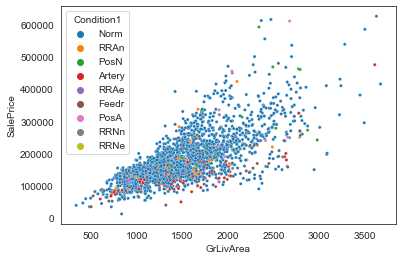

In [37]:
# Housing where condition1 is not norm is significanctly lower priced.
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Condition1", s=10, data=housing);

However, plotting the groups seperately reveals different slopes.

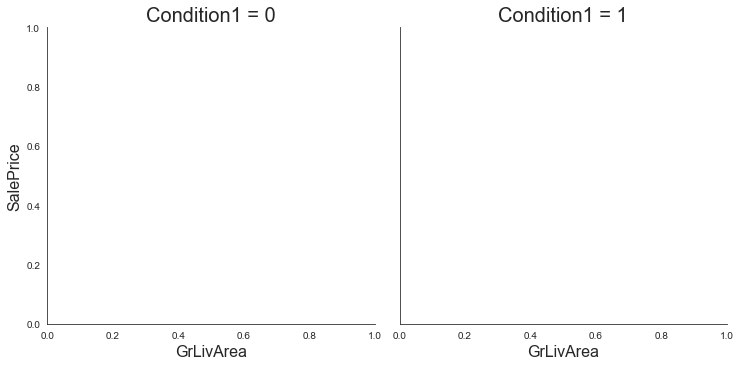

In [38]:
street = [1]

plot = sns.lmplot(
    x="GrLivArea", y="SalePrice", col="Condition1", hue="Condition1",
    col_order=[0] + street,
    data=housing, robust=True, col_wrap=4, ci=None, truncate=True, scatter_kws={"s": 10},
)
# Adjust font sizes.
for ax in plot.axes:
    ax.set_title(ax.get_title(), fontsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)

<AxesSubplot:xlabel='TotalSF'>

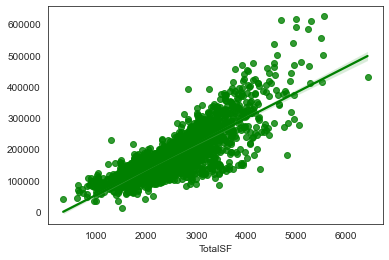

In [39]:
#get total square footage of house
housing['TotalSF'] = housing['TotalBsmtSF'] + housing['1stFlrSF'] + housing['2ndFlrSF']
#clean_data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1, inplace=True)
#look at TotalSquareFt against Price
y_train2 = housing.SalePrice.values
figsize=(22,60)
sns.regplot(x = housing.TotalSF, y = y_train2, color='green' )

Extract factor variables *major_street*, *railway*, and *park*.

### Exterior

This dimensions tells the main material with which the houses are made of. The category is too diverse and the various grouped scatter plots did not reveal differing slopes.

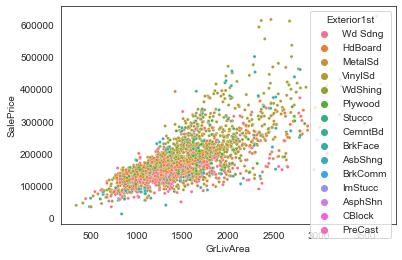

In [40]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Exterior1st", s=10, data=housing);

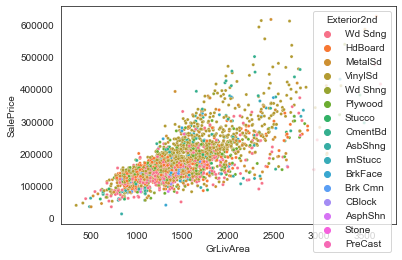

In [41]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Exterior2nd", s=10, data=housing);

### Foundation

The type of foundation appears to have an effect. Houses with Pconc foundations have higher prices compared to the rest

### Garage Type

The garagetype is significant for the SalePrice

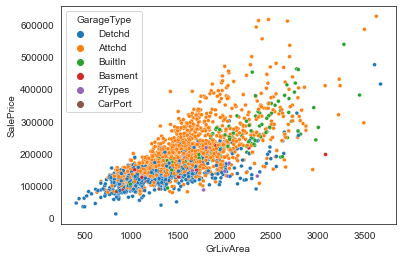

In [42]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="GarageType", s=15, data=housing);

### Heating

Most of the houses have gas.

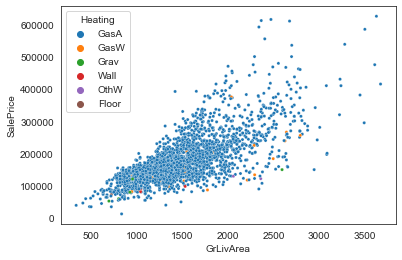

In [43]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Heating", s=10, data=housing);

### House Style


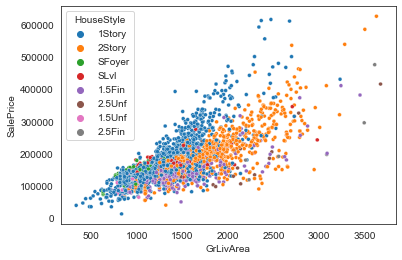

In [44]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="HouseStyle", s=15, data=housing);

### Land Contour

This variable is assumed to contain the same information as the ordinal variable *Land Slope* and is dropped.

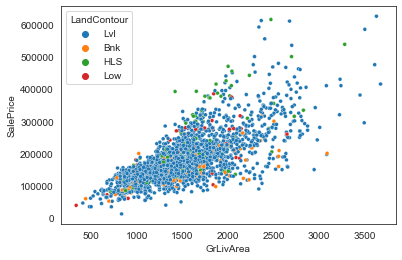

In [45]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="LandContour", s=15, data=housing);

### Lot Configuration

This variable shows no good pattern and is dropped.

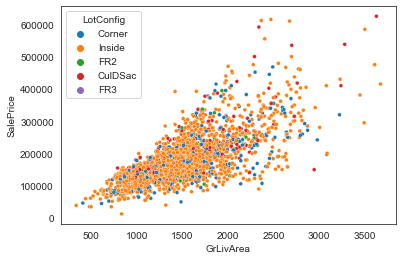

In [46]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="LotConfig", s=15, data=housing);

### Masonry Veneer Type

"Stone" has a higher slope than others

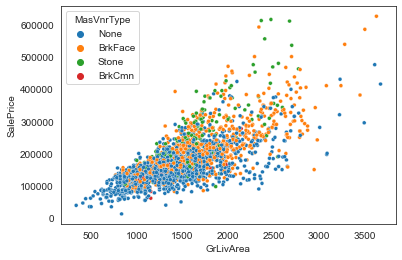

In [47]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="MasVnrType", s=15, data=housing);

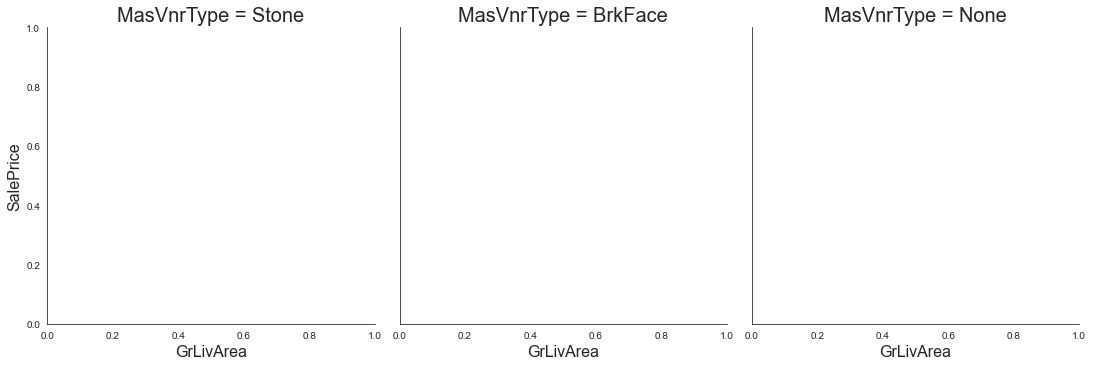

In [77]:
street = ["BrkFace"]
none =["None"]
plot = sns.lmplot(
    x="GrLivArea", y="SalePrice", col="MasVnrType", hue="MasVnrType",
    col_order=["Stone"] + street+none,
    data=housing, robust=True, col_wrap=4, ci=None, truncate=True, scatter_kws={"s": 10},
)
# Adjust font sizes.
for ax in plot.axes:
    ax.set_title(ax.get_title(), fontsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)

### Roof

Roofs in Ames, IA, are not special enough to make a difference in the price. Even "hip" roofs seem already priced in bigger houses.

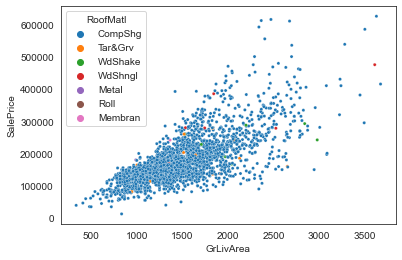

In [49]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="RoofMatl", s=10, data=housing);

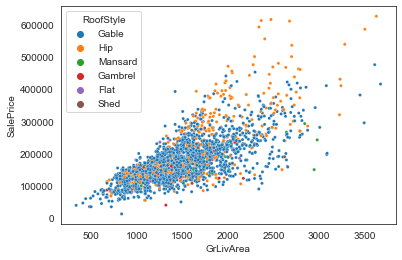

In [50]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="RoofStyle", s=10, data=housing);

### Sale Info

Partial and abnormal (= foreclosure) sales seem to make a change with higher and lower prices respectively. These two types will be encoded in factor variables *partial_sale* and *abnormal_sale*. The impact seems to be not big though.

In [51]:
housing["SaleCondition"].value_counts()

Normal     2412
Partial      81
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: SaleCondition, dtype: int64

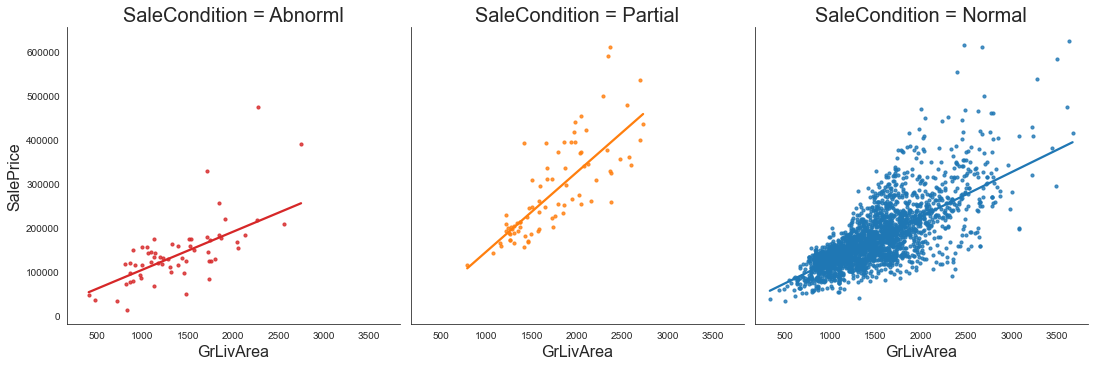

In [52]:
partial = ["Partial"]
norm =["Normal"]
plot = sns.lmplot(
    x="GrLivArea", y="SalePrice", col="SaleCondition", hue="SaleCondition",
    col_order=["Abnorml"] + partial+norm,
    data=housing, robust=True, col_wrap=4, ci=None, truncate=True, scatter_kws={"s": 10},
)
# Adjust font sizes.
for ax in plot.axes:
    ax.set_title(ax.get_title(), fontsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)

In [53]:
### Sale types New and Con have higher prices

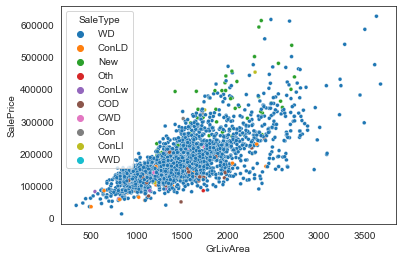

In [54]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="SaleType", s=15, data=housing);

## Age & Remodeling

The dataset was put together between 2006 and 2010. Therefore, the variables with year numbers need to be aligned to indicate the right ages.

Convert the years to age by subtracting it from 2010. Then take the squareroot to reduce the effect of older houses on the outcome

### Corelation

<AxesSubplot:>

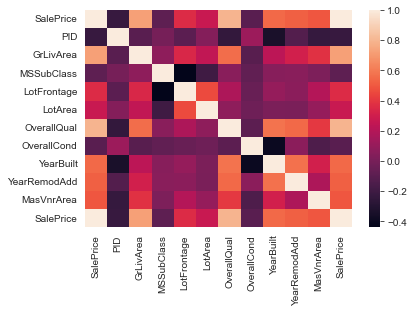

In [55]:

corr = pd.concat([housing.iloc[:,:30], housing['SalePrice']], axis=1).corr()
sns.heatmap(corr)

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_71618/2112131339.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data, dtype=np.bool)
/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_71618/2112131339.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=10)
/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_71618/2112131339.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, fontsize=10)


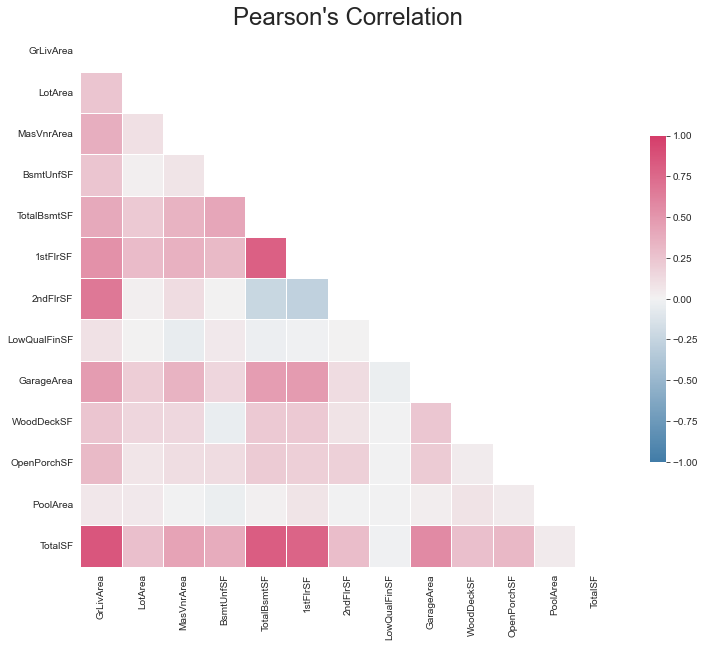

In [56]:
def plot_correlation(data, title):
    """Visualize a correlation matrix in a nice heatmap."""
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_title(title, fontsize=24)
    # Blank out the upper triangular part of the matrix.
    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Use a diverging color map.
    cmap = sns.diverging_palette(240, 0, as_cmap=True)
    # Adjust the labels' font size.
    labels = data.columns
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_yticklabels(labels, fontsize=10)
    # Plot it.
    sns.heatmap(
        data, vmin=-1, vmax=1, cmap=cmap, center=0, linewidths=.5,
        cbar_kws={"shrink": .5}, square=True, mask=mask, ax=ax
    )

size_related = housing.filter(regex='SF$|Area$').fillna(1)

pearson = size_related.corr(method="pearson")
plot_correlation(pearson, "Pearson's Correlation")

In [57]:
#  TotalBmntSf is highly correlated with IstFlrSF

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_71618/2112131339.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data, dtype=np.bool)
/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_71618/2112131339.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=10)
/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_71618/2112131339.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, fontsize=10)


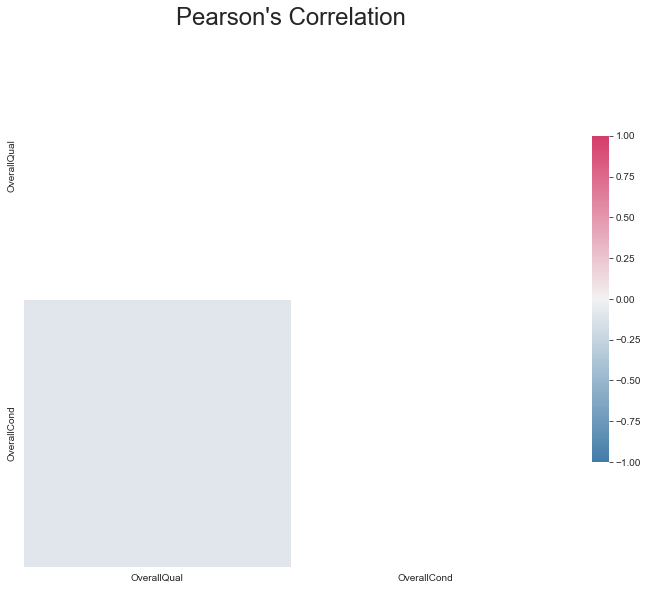

In [58]:
qual_related = housing.filter(regex='Qual$|Cond$')
pearson = qual_related.corr(method="pearson")
plot_correlation(pearson, "Pearson's Correlation")

### 3D Visualisation

In [59]:
housing.OverallQual

1      6
2      5
3      5
4      4
5      8
      ..
759    6
760    3
761    5
762    7
763    8
Name: OverallQual, Length: 2577, dtype: int64

In [65]:
housing["TotalSF"]

0       1712.0
1       2098.0
2       1838.0
3       1444.0
4       2475.0
         ...  
6845    2520.0
6847    1733.0
6848    3003.0
6849    2827.0
6850    2688.0
Name: TotalSF, Length: 6794, dtype: float64

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_71618/2482459823.py:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


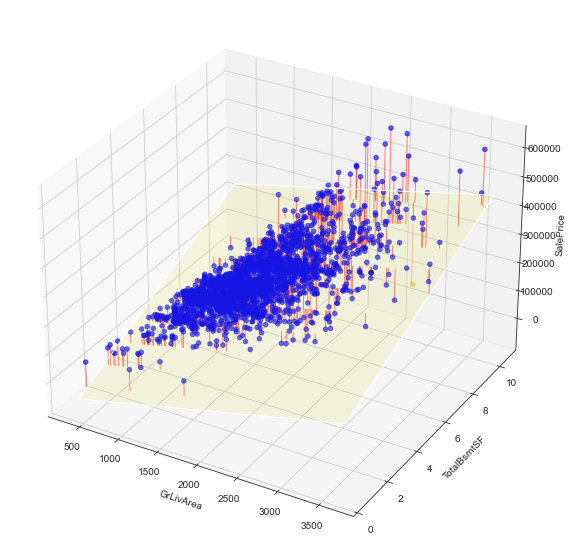

In [60]:
housing_plot1 = housing[[ "GrLivArea",'OverallQual']]
price = housing["SalePrice"]
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(housing_plot1, price)
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
N = len(price)
beta = np.array([np.round(ols.intercept_, 1), np.round(ols.coef_, 1)[0], np.round(ols.coef_, 1)[1]])
x_m = np.array(housing_plot1.head(N)) #np.random.randn(N, 2)
y_m = np.array(price.head(N))#np.dot(np.append(np.ones((N,1)), x_m, axis=1), beta) + np.random.randn(N)*4
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
# plot the data points
X = np.array(list(map(lambda x: [3]+ list(x), x_m)))  # Idiomatic Py3, but inefficient on Py2
up = np.where(y_m >= np.sum(X*beta, axis=1))[0]
down = np.where(y_m < np.sum(X*beta, axis=1))[0]
ax.scatter(x_m[up, 0], x_m[up, 1], y_m[up], c='blue', alpha=.6)
ax.scatter(x_m[down, 0], x_m[down, 1], y_m[down], c='orange', alpha=.4)

# plot the error bars
ax = fig.gca(projection='3d')
x_up = x_m[up,:]; y_up = y_m[up]
up_kwargs = dict(color='red', alpha=.6, lw=0.8)
for i, j, k in zip(x_up[:, 0], x_up[:, 1], y_up):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **up_kwargs)
    
x_down = x_m[down,:]; y_down = y_m[down]
down_kwargs = dict(color='red', alpha=.3, lw=0.8)
for i, j, k in zip(x_down[:,0], x_down[:,1], y_down):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **down_kwargs)
    
    
# plot the plane which represents the true model
x_1 = np.linspace(min(x_m[:, 0])-.5, max(x_m[:, 0])+.5, 25)
x_2 = np.linspace(min(x_m[:, 1])-.5, max(x_m[:, 1])+.5, 25)
x_1, x_2 = np.meshgrid(x_1, x_2)
x_3 = beta[1]*x_1 + beta[2]*x_2 + beta[0]
surface_kwargs = dict(rstride=100, cstride=100, color='yellow', alpha=0.1)
ax.plot_surface(x_1, x_2, x_3, **surface_kwargs)
ax.set_xlabel('GrLivArea')
ax.set_ylabel('OverallQual')
ax.set_zlabel('SalePrice')
plt.show()

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_71618/2748605339.py:23: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0, 'SalePrice')

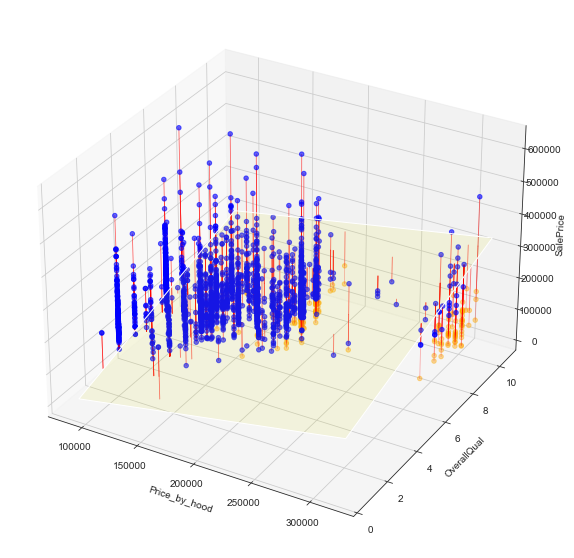

In [67]:
## 3D scatter plot
housing_plot2 = housing[[ "Price_by_hood",'OverallQual']]
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(housing_plot2, housing["SalePrice"])

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
N = len(price)
beta = np.array([np.round(ols.intercept_, 1), np.round(ols.coef_, 1)[0], np.round(ols.coef_, 1)[1]])
x_m = np.array(housing_plot2.head(N)) #np.random.randn(N, 2)
y_m = np.array(price.head(N))#np.dot(np.append(np.ones((N,1)), x_m, axis=1), beta) + np.random.randn(N)*4
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
# plot the data points
X = np.array(list(map(lambda x: [3]+ list(x), x_m)))  # Idiomatic Py3, but inefficient on Py2
up = np.where(y_m >= np.sum(X*beta, axis=1))[0]
down = np.where(y_m < np.sum(X*beta, axis=1))[0]
ax.scatter(x_m[up, 0], x_m[up, 1], y_m[up], c='blue', alpha=.6)
ax.scatter(x_m[down, 0], x_m[down, 1], y_m[down], c='orange', alpha=.4)

# plot the error bars
ax = fig.gca(projection='3d')
x_up = x_m[up,:]; y_up = y_m[up]
up_kwargs = dict(color='red', alpha=.6, lw=0.8)
for i, j, k in zip(x_up[:, 0], x_up[:, 1], y_up):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **up_kwargs)
    
x_down = x_m[down,:]; y_down = y_m[down]
down_kwargs = dict(color='red', alpha=.3, lw=0.8)
for i, j, k in zip(x_down[:,0], x_down[:,1], y_down):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **down_kwargs)
    
    
# plot the plane which represents the true model
x_1 = np.linspace(min(x_m[:, 0])-.5, max(x_m[:, 0])+.5, 25)
x_2 = np.linspace(min(x_m[:, 1])-.5, max(x_m[:, 1])+.5, 25)
x_1, x_2 = np.meshgrid(x_1, x_2)
x_3 = beta[1]*x_1 + beta[2]*x_2 + beta[0]
surface_kwargs = dict(rstride=100, cstride=100, color='yellow', alpha=0.1)
ax.plot_surface(x_1, x_2, x_3, **surface_kwargs)
ax.set_xlabel('Price_by_hood')
ax.set_ylabel('OverallQual')
ax.set_zlabel('SalePrice')

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_71618/1686658790.py:23: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


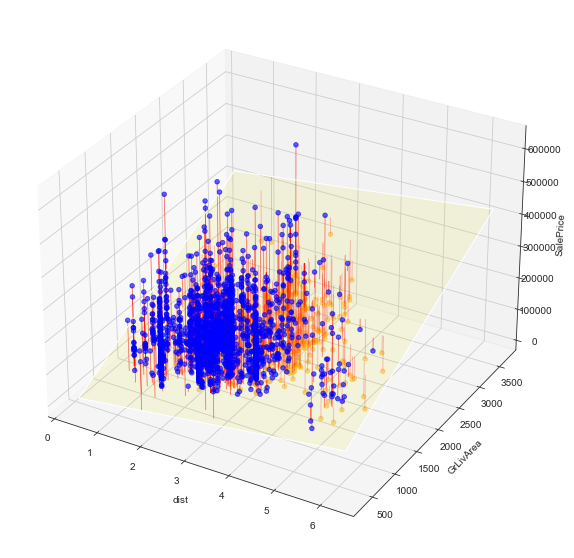

In [69]:
## 3D scatter plot
housing_plot3 = housing[[ "dist",'GrLivArea']]
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(housing_plot3, housing["SalePrice"])

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
N = len(price)
beta = np.array([np.round(ols.intercept_, 1), np.round(ols.coef_, 1)[0], np.round(ols.coef_, 1)[1]])
x_m = np.array(housing_plot3.head(N)) #np.random.randn(N, 2)
y_m = np.array(price.head(N))#np.dot(np.append(np.ones((N,1)), x_m, axis=1), beta) + np.random.randn(N)*4
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
# plot the data points
X = np.array(list(map(lambda x: [3]+ list(x), x_m)))  # Idiomatic Py3, but inefficient on Py2
up = np.where(y_m >= np.sum(X*beta, axis=1))[0]
down = np.where(y_m < np.sum(X*beta, axis=1))[0]
ax.scatter(x_m[up, 0], x_m[up, 1], y_m[up], c='blue', alpha=.6)
ax.scatter(x_m[down, 0], x_m[down, 1], y_m[down], c='orange', alpha=.4)

# plot the error bars
ax = fig.gca(projection='3d')
x_up = x_m[up,:]; y_up = y_m[up]
up_kwargs = dict(color='red', alpha=.6, lw=0.8)
for i, j, k in zip(x_up[:, 0], x_up[:, 1], y_up):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **up_kwargs)
    
x_down = x_m[down,:]; y_down = y_m[down]
down_kwargs = dict(color='red', alpha=.3, lw=0.8)
for i, j, k in zip(x_down[:,0], x_down[:,1], y_down):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **down_kwargs)
    
    
# plot the plane which represents the true model
x_1 = np.linspace(min(x_m[:, 0])-.5, max(x_m[:, 0])+.5, 25)
x_2 = np.linspace(min(x_m[:, 1])-.5, max(x_m[:, 1])+.5, 25)
x_1, x_2 = np.meshgrid(x_1, x_2)
x_3 = beta[1]*x_1 + beta[2]*x_2 + beta[0]
surface_kwargs = dict(rstride=100, cstride=100, color='yellow', alpha=0.1)
ax.plot_surface(x_1, x_2, x_3, **surface_kwargs)
ax.set_xlabel('dist')
ax.set_ylabel('GrLivArea')
ax.set_zlabel('SalePrice')
plt.show()

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_71618/1594359447.py:24: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0, 'PricePerSF')

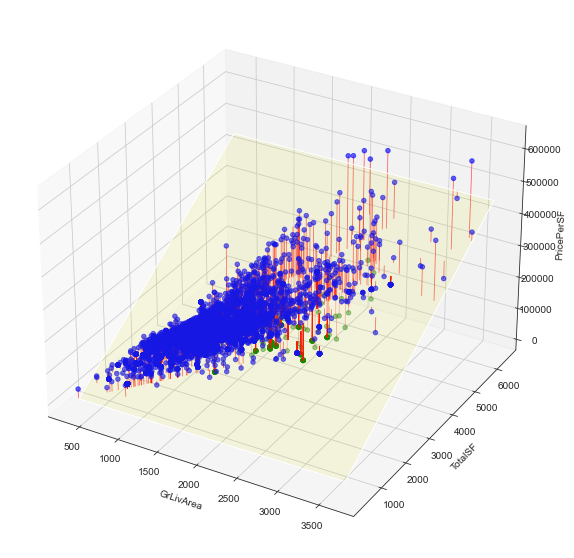

In [71]:
## 3D scatter plot
housing_plot2 = housing[['GrLivArea', "TotalSF"]]
price = housing["SalePrice"]
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(housing_plot2, price)

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
N = len(price)
beta = np.array([np.round(ols.intercept_, 1), np.round(ols.coef_, 1)[0], np.round(ols.coef_, 1)[1]])
x_m = np.array(housing_plot2.head(N)) #np.random.randn(N, 2)
y_m = np.array(price.head(N))#np.dot(np.append(np.ones((N,1)), x_m, axis=1), beta) + np.random.randn(N)*4
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
# plot the data points
X = np.array(list(map(lambda x: [5]+ list(x), x_m)))  # Idiomatic Py3, but inefficient on Py2
up = np.where(y_m >= np.sum(X*beta, axis=1))[0]
down = np.where(y_m < np.sum(X*beta, axis=1))[0]
ax.scatter(x_m[up, 0], x_m[up, 1], y_m[up], c='blue', alpha=.6)
ax.scatter(x_m[down, 0], x_m[down, 1], y_m[down], c='green', alpha=.4)

# plot the error bars
ax = fig.gca(projection='3d')
x_up = x_m[up,:]; y_up = y_m[up]
up_kwargs = dict(color='red', alpha=.6, lw=0.8)
for i, j, k in zip(x_up[:, 0], x_up[:, 1], y_up):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **up_kwargs)
    
x_down = x_m[down,:]; y_down = y_m[down]
down_kwargs = dict(color='red', alpha=.3, lw=0.8)
for i, j, k in zip(x_down[:,0], x_down[:,1], y_down):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **down_kwargs)
    
    
# plot the plane which represents the true model
x_1 = np.linspace(min(x_m[:, 0])-.5, max(x_m[:, 0])+.5, 25)
x_2 = np.linspace(min(x_m[:, 1])-.5, max(x_m[:, 1])+.5, 25)
x_1, x_2 = np.meshgrid(x_1, x_2)
x_3 = beta[1]*x_1 + beta[2]*x_2 + beta[0]
surface_kwargs = dict(rstride=100, cstride=100, color='yellow', alpha=0.1)
ax.plot_surface(x_1, x_2, x_3, **surface_kwargs)
ax.set_xlabel('GrLivArea')
ax.set_ylabel('TotalSF')
ax.set_zlabel('SalePrice')

### Interaction of numerical features with SalePrice

In [ ]:

import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
lst = list(size_related.columns)+list(qual_related.columns)

X_1= housing[lst]
y_bos = housing["SalePrice"]
fig = plt.figure(figsize=(14, 66))
gs = gridspec.GridSpec(len(lst), 2)

for i in range(len(lst)):
    ax1 = plt.subplot(gs[i, 0])
    ax2 = plt.subplot(gs[i, 1])    
    sns.regplot(y_bos[X_1.iloc[:, i]>0], X_1.iloc[:, i][X_1.iloc[:, i]>0], ax=ax1)
    ax1.set_title('{}'.format(X_1.columns[i]))
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
    X_1[X_1.columns[i]].hist(bins=50, ax=ax2, orientation='horizontal',color="g")    
    ax2.set_ylim((ylim[0], ylim[1]))
    ax2.set_xlabel('')
    ax2.set_xlim((0, 200))
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

In [ ]:

import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt

X_1= size_related
L = len(X_1.columns)
y_bos = housing["SalePrice"]
fig = plt.figure(figsize=(10, 35))
gs = gridspec.GridSpec(L, 1)

for i in range(L-1):
    ax1 = plt.subplot(gs[i, 0])    
    sns.regplot(X_1.iloc[:, i][X_1.iloc[:, i+1]>0], X_1.iloc[:, i+1][X_1.iloc[:, i+1]>0], ax=ax1)
    ax1.set_title('{}'.format(X_1.columns[i+1]))
    ax1.set_xlabel('{}'.format(X_1.columns[i]))
    ylim = ax1.get_ylim()   
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()